# Todo acerca de la Tokenización :(

## Introducción
* La tokenización es un proceso que está en el corazón de los LLMs modernos. Es parte integral. Todo se mide en tokens.
* Ya hicimos tokenización, sin darnos cuenta. Pero lo hicimos a nivel de caracteres.
* Los modelos de lenguajes modernos utilizan Byte Pair Encodding (BPE) para construir el vocabulario de tokens.

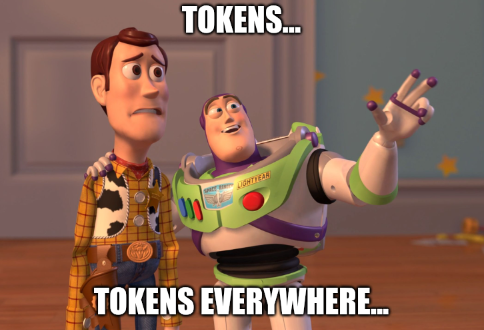
* Todo son tokens
  * El tamaño del contexto se mide en **tokens**.
  * Los embeddings son de **tokens**.
  * El mecanismo de Attention aprende las relaciones entre **tokens**.
  * El modelo predice la distribución de probabilidad para el siguiente **token** más probable.
  * Las APIs para interactuar con modelos de lenguajes cobran en 💰/**token**.

* Muchas cosas raras respecto a los LLMs se explican por la tokenización.
  * Por qué los LLMs no pueden deletrear palabras?
  * Por qué el rendimiento de los LLMs es mejor en algunos idiomas que en otros?
  * Por qué los LLMs fallan al hacer operaciones con strings como reverse?
  * Por qué los LLMs son tan malos en matemáticas?
  * Por qué programan en algunos lenguajes mejor que en otros?
  * Tokens raros?

## Que ve un LLM cuando le preguntamos "Cuantas letras tiene Google?"
Estas herramientas tiene permiten tokenizar (codificar en tokens) un texto cualquiera. Corren en el navegador y no hace falta instalar nada.
* [TikTokenizer](https://tiktokenizer.vercel.app/?model=gpt-4o)
* [Tokenizer Playground](https://huggingface.co/spaces/Xenova/the-tokenizer-playground)
* [GPT Tokenizer](https://gpt-tokenizer.dev/) (💸 incluye cálculo de costos 💸)
* ...

# Tokenizemos esto con diferentes tokenizers...
```
google
 google
Google
 Google
GOOGLE
 GOOGLE
```
############
```
The essential is invisible to the eyes.
Lo esencial es invisible a los ojos.
L'essentiel est invisible pour les yeux.
本質的東西是眼睛看不見的。
To podstatné je očím neviditelné.
Самого главного глазами не увидишь.
```
############
```
123+456=579
1234+4567=5801
123 + 456 = 579
1234 + 4567 = 5801
```
#############
```json
{
  "id": 1,
  "name": "anonymous",
  "address": {
    "city": "Hanoi",
    "country": "Vietnam"
  }
}
```
```yaml
id: 1
name: anonymous
address:
  city: Hanoi
  country: Vietnam
```
```python
class MultiHeadAttention(nn.Module):
    def __init__(self, num_head, n_embd, head_size):
        super().__init__()
        self.heads = nn.ModuleList([SelfAttentionHead(n_embd, head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out
```

## Tokenization Free LLMs?
Gloria y loor a quien libre a los modelos de lenguajes de la necesidad de tokenizar la entrada.

* https://arxiv.org/abs/2305.07185
* https://arxiv.org/abs/2412.09871
* https://arxiv.org/pdf/2507.07955

## Unicode - Code Points - Encodings

In [1]:
texto = "Chci platit hotově 💵. Nemám věrnostní kartu 💳. Quiero pagar con efectivo. No tengo tarjeta de puntos"
texto

'Chci platit hotově 💵. Nemám věrnostní kartu 💳. Quiero pagar con efectivo. No tengo tarjeta de puntos'

## Por qué no podemos meter bytes en el modelo?
Sí, podemos. Pero esto presenta ciertas deventajas. Lo queremos es poder tener un tamaño de contexto lo más grande posible pero esto en general está limitado por el poder de cómputo disponible. Tener contextos muy largos requiere tranformers con Attention Layers muy grandes.

Cuanto más grande el vocabulario de tokens, más comprimida es la representación del texto de entrada, pero más grande la matriz de embeddings y la salida del softmax. 

Necesitamos encontrar un balance entre el tamaño del vocabulario y el tamaño del contexto. Pero también nos gustaría soportar UTF-8 como enconding. Entonces? que hacemos?


## Byte Pair Encoding
Es un algoritmo de compresión, adaptado por R. Sennrich et al. para su uso en pre-procesamiento de texto para lenguaje natural. El algoritmo es muy sencillo y hoy forma parte de la mayoría de los tokenizers modernos para LLMs.

https://aclanthology.org/P16-1162.pdf

Supongamos que queremos codificar la cadena `s = aaabdaaabcab`. Como la cadena tiene los caractéres, nuestro vocabulario inicial de tokens `V = {a b c d}`.
1. El primer paso del algoritmo es encontrar el par de tokens que más veces se repite.
2. El segundo paso es agregar un nuevo token, al vocabulario `V = {a b c d e}`.
3. El tercer paso es reemplazar el par de tokens más común en la cadena original por el nuevo token.

### Iteración 0
`V = {a b c d}`

`s = aaabdaaabcab`

El par más frecuente es `aa`.

### Iteración 1

`V = {a b c d e}`

`s = eabdeabcab`

El par más frecuente es `ab`.

### Iteración 3

`V = {a b c d e f}`

`s = efdefcf`

El par más frecuente es `ef`.

### Iteración 4

`V = {a b c d e f g}`

`s = gdgcf`

El par más frecuente es `gd`.

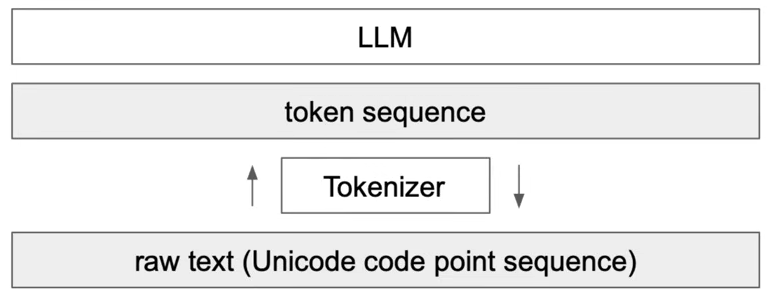

Como resultado vamos a tener una etapa de entrenamiento (train) del tokenizer, en la cual construimos el vocabulario. Conseguido esto, tendremos una forma de codificar (encode) texto en UTF-8 de manera arbitraria, cambiando grupos de caracteres por su token equivalente del vocabulario y viseversa, una forma de decodificar (decode) tokens en strings UTF-8. 

## Train!

In [9]:
# https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = list(text.encode())
print('--------------------')
print(text)
print(len(text))
print('--------------------')
print(tokens)
print(len(tokens))
print('--------------------')

--------------------
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
533
--------------------
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 15

## Decoding

## Encoding

# Poniendo todo junto

## Evitando combinaciones con regexes
https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf

https://github.com/openai/gpt-2

# Usando TikToken
TikToken es la librería de tokenización de OpenIA. Incluye herramientas para cargar diferentes tokenizers ya entrenados, para agregar nuevos tokens al vocabulario y por supuesto, hacer encoding y decoding. Sin embargo, no permite entrenar tokenizers desde cero.

Para hacer encoding, Tiktoken toma los code points Unicode, los transforma a bytes (usando `.encode('utf-8')`) y luego encodea los bytes. Los merges durante el entrenamiento son a nivel de bytes y no a nivel de code points. 

https://github.com/openai/tiktoken

## Tokens especiales

# SentencePiece
SentencePiece es un animal completamente distinto a tiktoken. Al contrario que TikToken, permite el entrenamiento de tokenizers utilizando diferentes algoritmos, no solo BPE. Como consecuencia, es bastante más difícil de usar y entender que TikToken.

Para hacer encoding, SentencePiece (también al contrario que Tiktoken) utiliza los code points de Unicode directamente para encodear. Los merges durante el entrenamiento son a nivel de code points y no a nivel de bytes. Si el vocabulario no alcanza a representar todos los code points, dependiendo de la configuración de SentencePiece o bien a los code points restantes se les asigna un token `UNK` (desconocido) o bien se hace fallback a bytes UTF-8.

https://github.com/google/sentencepiece

https://colabdoge.medium.com/understanding-sentencepiece-under-standing-sentence-piece-ac8da59f6b08

## Entrenando un tokenizer con SentencePiece

In [167]:
import sentencepiece as spm
import os

In [242]:
options = dict(
    input="data/martinfierro.txt",
    input_format="text",
    model_prefix="tok1k",
    model_type="bpe",
    vocab_size=1024,
    normalization_rule_name="identity",
    remove_extra_whitespaces=False,
    input_sentence_size=2000000000,
    max_sentence_length=4192,
    seed_sentencepiece_size=1000000,
    shuffle_input_sentence=True,
    character_coverage=0.99995,
    byte_fallback=True,
    # merge rules
    split_digits=True,
    split_by_unicode_script=True,
    split_by_whitespace=True,
    split_by_number=True,
    max_sentencepiece_length=16,
    add_dummy_prefix=True,
    allow_whitespace_only_pieces=True,
    # tokens especiales
    unk_id=0,
    bos_id=1,
    eos_id=2,
    pad_id=-1,
    num_threads=os.cpu_count()-2,
)

# El vocabulario y los transformers

## Impacto del tamaño del vocabulario en la arquitectura
Cual es el tamaño óptimo del vocabulario para nuestro pequeño modelo de lenguajes?
* `vocab_size` (`charset_size`) solo aparece en la capa de Embeddings y en la salida. No puede ser infinito por tres razones:
  * La cantidad de parámetros de la capa de Embedding y la capa de salida crece linealmente con la cantidad de tokens en el vocabulario
  * Si la cantidad de tokens diferentes es muy grande comparada con la cantidad de tokens disponibles en el training set, muchos parámetros de nuestra capa de embedding no van a entrenarse lo suficiente (under training).
  * Cuantos más tokens, más largas son las secuencias que representan y más condensada es la información contenida en cada token. Eventualmente el transformer no va a poder hacer uso de esa información para predecir el siguiente token.
En general, el tamaño del vocabulario se ajusta empíricamente. En los modelos modernos ronda los 100K a 200K. 

## Como agregar tokens al vocabulario
Es posible agregar tokens al vocabulario una vez entrenados tanto el tokenizer como el modelo de lenguaje. Basta cambiar los tamaños de la capa de Embeddings y de la salida. Los paramentros de estas capas se inicializan de manera random. Es posible congelar los pesos del resto de las capas del modelo y reentrenar solamente estas capas.

Esta es una práctica común, por ejemplo durante la conversión de un modelo fundacional a un asistente, para el cual es necesario agregar los tokens que delimitan el prompt del usuario, del sistema y del asistente, o cuando se busca convertir el modelo de lenguaje en un clasificador, etc.

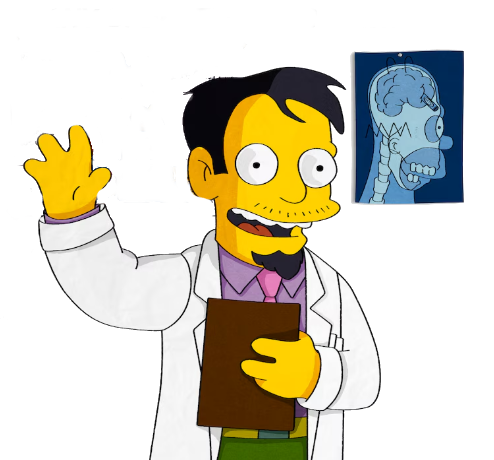

# Reeviendo la lista de problemas con los LLMs.
  * Por qué los LLMs no pueden deletrear palabras?
  * Por qué el rendimiento de los LLMs es mejor en algunos idiomas que en otros?
  * Por qué los LLMs fallan al hacer operaciones con strings como reverse?
  * Por qué los LLMs son tan malos en matemáticas?
  * Por qué programan en algunos lenguajes mejor que en otros?
  * Tokens raros?

https://www.beren.io/2023-02-04-Integer-tokenization-is-insane/

https://www.lesswrong.com/posts/aPeJE8bSo6rAFoLqg/solidgoldmagikarp-plus-prompt-generation

# Tokenización en dominios multimodales
Vale aplicar algorimos parecidos para tokenizar la entrada en dominios que no sean texto, por ejemplo, audio, imagenes e incluso video.

https://compvis.github.io/taming-transformers/

https://arxiv.org/pdf/2412.13061v1

https://ravinkumar.com/GenAiGuidebook/audio/audio_tokenization.html

# Conclusiones
* La tokenización es todo un tema en todo lo referido a LLMs. No hay que tomarlo a la ligera.
  * Puede generar problemas de seguridad, de rendimiento
* Si necesitas un tokenizer, usar TikToken y algún modelo ya pre-entrenado.
* Si hace falta entrenar un tokenizer específico, entonces SentencePiece con BPE
  * Pegarle una mirada a [MinBPE de Andrej Karpathy](https://github.com/karpathy/minbpe)

# Ejercicios
* Modificar la clase tokenizer para que incluya la regex para dividir palabras antes de hacer BPE.
* Entrenar un modelo decoder only usando un tokenizer en lugar de hacerlo a nivel de caracteres.